In [1]:
!pip install transformers torch matplotlib


  Using cached transformers-4.41.2-py3-none-any.whl.metadata (43 kB)
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached huggingface_hub-0.23.4-py3-none-any.whl.metadata (12 kB)
  Using cached tokenizers-0.19.1-cp311-none-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.4.3-cp311-none-win_amd64.whl.metadata (3.9 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached transformers-4.41.2-py3-none-any.whl (9.1 MB)
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB 435.7 kB/s eta 0:06:07
   ---------------------------------------- 0.1/159.8 MB 409.6 kB/s eta 0:06:30
   ---------------------------------------- 0.1/159

In [9]:
import torch
from transformers import BertTokenizer, BertForMaskedLM
import matplotlib.pyplot as plt
import numpy as np


In [10]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
def predict_masked_word(text, top_k=5):
    inputs = tokenizer(text, return_tensors='pt')
    mask_token_index = torch.where(inputs['input_ids'] == tokenizer.mask_token_id)[1]
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    mask_token_logits = logits[0, mask_token_index, :]
    top_k_tokens = torch.topk(mask_token_logits, top_k, dim=1).indices[0].tolist()
    predicted_tokens = [tokenizer.decode([token]) for token in top_k_tokens]
    return predicted_tokens


In [12]:
text = "The capital of France is [MASK]."
predicted_words = predict_masked_word(text)
print(f"Original sentence: {text}")
print(f"Predicted words: {predicted_words}")


Original sentence: The capital of France is [MASK].
Predicted words: ['paris', 'lille', 'lyon', 'marseille', 'tours']


In [13]:
sentences = [
    "The capital of France is [MASK].",
    "The largest mammal is the [MASK].",
    "The inventor of the telephone is [MASK]."
]

for sentence in sentences:
    predicted_words = predict_masked_word(sentence)
    print(f"Original sentence: {sentence}")
    print(f"Predicted words: {predicted_words}")
    print()


Original sentence: The capital of France is [MASK].
Predicted words: ['paris', 'lille', 'lyon', 'marseille', 'tours']

Original sentence: The largest mammal is the [MASK].
Predicted words: ['elephant', 'leopard', 'coyote', 'wolf', 'lion']

Original sentence: The inventor of the telephone is [MASK].
Predicted words: ['unknown', 'uncertain', 'obscure', 'anonymous', 'unclear']



In [14]:
creative_sentences = [
    "A [MASK] a day keeps the doctor away.",
    "To be or not to [MASK], that is the question.",
    "All that glitters is not [MASK]."
]

for sentence in creative_sentences:
    predicted_words = predict_masked_word(sentence)
    print(f"Original sentence: {sentence}")
    print(f"Predicted words: {predicted_words}")
    print()


Original sentence: A [MASK] a day keeps the doctor away.
Predicted words: ['doctor', 'day', 'pill', 'week', 'patient']

Original sentence: To be or not to [MASK], that is the question.
Predicted words: ['be', 'do', 'become', 'have', 'exist']

Original sentence: All that glitters is not [MASK].
Predicted words: ['love', 'real', 'gold', 'me', 'enough']



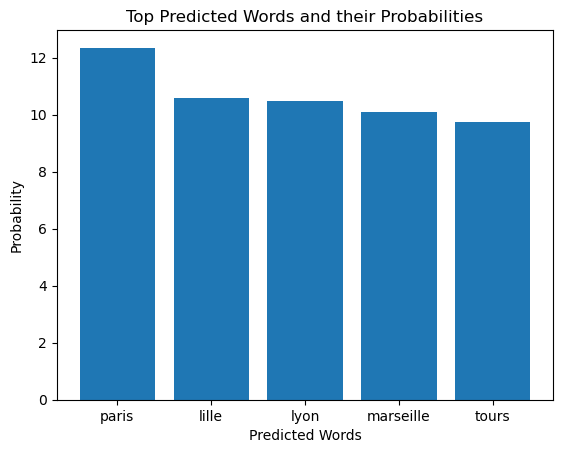

In [15]:
def predict_masked_word_with_probs(text, top_k=5):
    inputs = tokenizer(text, return_tensors='pt')
    mask_token_index = torch.where(inputs['input_ids'] == tokenizer.mask_token_id)[1]
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    mask_token_logits = logits[0, mask_token_index, :]
    top_k_tokens = torch.topk(mask_token_logits, top_k, dim=1).indices[0].tolist()
    top_k_probs = torch.topk(mask_token_logits, top_k, dim=1).values[0].tolist()
    predicted_tokens = [tokenizer.decode([token]) for token in top_k_tokens]
    return predicted_tokens, top_k_probs

# Test and visualize
text = "The capital of France is [MASK]."
predicted_words, probs = predict_masked_word_with_probs(text)

plt.bar(predicted_words, probs)
plt.xlabel('Predicted Words')
plt.ylabel('Probability')
plt.title('Top Predicted Words and their Probabilities')
plt.show()
